# EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset: Penetracion de internet

### Acceso por cada 100 habitantes

In [134]:
df = pd.read_excel('Datasets/1_Internet_Penetracion.xlsx', sheet_name='Penetración-poblacion')
df

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.720000
1,2022,4,Capital Federal,50.350000
2,2022,4,Catamarca,16.730000
3,2022,4,Chaco,11.660000
4,2022,4,Chubut,26.230000
...,...,...,...,...
859,2014,1,Santa Cruz,8.677327
860,2014,1,Santa Fe,15.077801
861,2014,1,Santiago Del Estero,4.058899
862,2014,1,Tierra Del Fuego,19.104921


Al observar el dataframe podemos ver que contiene datos relacionados con el acceso a internet en diferentes provincias de Argentina durante el año 2014 hasta el 2022 y separados por trimestres del año. 

- Año: Esta columna representa el año al que se refieren los datos. Desde el 2014 hasta el 2022
- Trimestre: En esta columna se especifica el trimestre al que pertenecen los datos. 
- Provincia: Esta columna indica la provincia en Argentina a la que se refieren los datos.
- Accesos por cada 100 hab: Esta columna contiene la cantidad de accesos a internet por cada 100 habitantes en la provincia correspondiente. Los valores en esta columna son numéricos y representan la cantidad de accesos por cada 100 habitantes.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       864 non-null    int64  
 1   Trimestre                 864 non-null    int64  
 2   Provincia                 864 non-null    object 
 3   Accesos por cada 100 hab  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Como podemos observar no se encuentran nulos dentro del dataset.

In [136]:
df['Provincia'] = df['Provincia'].astype('category')

Ponemos como category la columna Provincia.

#### Grafico sobre como se fue desarrollando la conectividad a internet desde el 2014 hasta el 2022

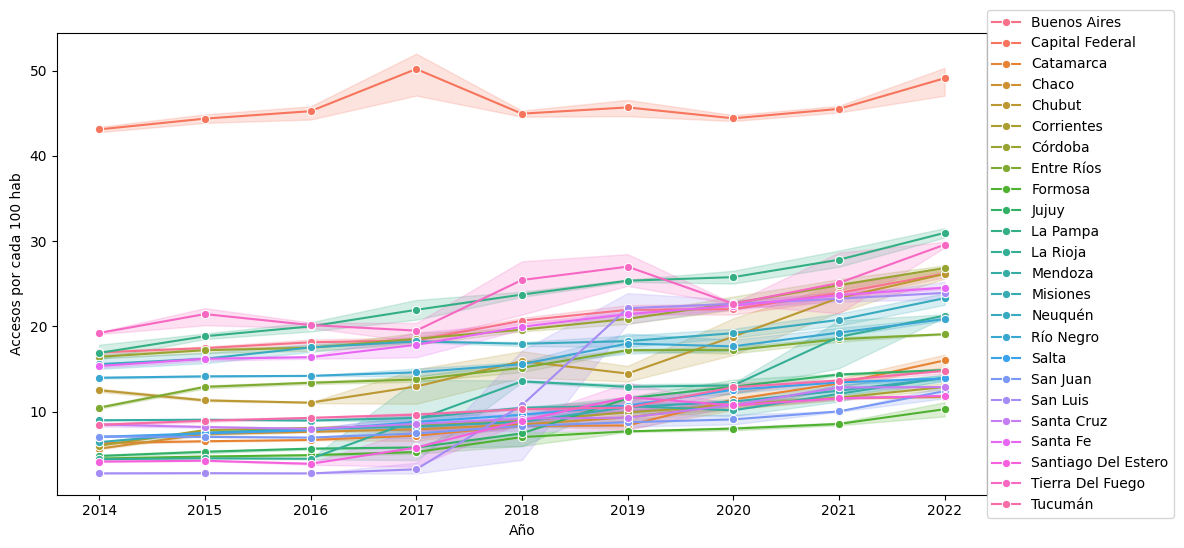

In [137]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Año',y='Accesos por cada 100 hab', data = df, hue='Provincia', marker='o')
plt.legend(loc=(1,-0.05))
plt.show()

Este gráfico de líneas proporciona una representación visual de cómo ha evolucionado el acceso a Internet a lo largo de los años en diferentes provincias. Los ejes de coordenadas se utilizan de la siguiente manera:

- **Eje X:** Representa el tiempo, con los años dispuestos en orden cronológico.
- **Eje Y:** Muestra el acceso a Internet expresado como la cantidad de conexiones por cada 100 habitantes en las provincias.

Al observar este gráfico, podemos realizar un análisis detallado de cómo la conectividad a Internet ha avanzado o retrocedido en el transcurso de los años en estas regiones. Cada punto en la línea de una provincia específica representa la situación de la conectividad en un año determinado. Las tendencias clave incluyen:

- Si la línea asciende, indica un aumento en la cantidad de conexiones por cada 100 habitantes en esa provincia, lo que generalmente se considera un avance positivo en términos de acceso a la red.
- Si la línea desciende, podría indicar una disminución en la conectividad, lo que podría ser motivo de preocupación.

Este tipo de gráfico no solo permite evaluar la tendencia general de la conectividad en las provincias a lo largo del tiempo, sino que también proporciona una visión más detallada de las variaciones a corto plazo que pueden haber ocurrido en cada región. Además, es una herramienta valiosa para identificar diferencias significativas en el acceso a Internet entre las provincias y comprender cómo estas disparidades han evolucionado a lo largo de los años.

Es importante tener en cuenta que las tendencias en la conectividad a Internet pueden estar influenciadas por una serie de factores, como inversiones en infraestructura, políticas gubernamentales, demanda de servicios, avances tecnológicos y eventos económicos y sociales. Al considerar todos estos elementos, este gráfico de líneas se convierte en una herramienta esencial para la toma de decisiones y la planificación de políticas destinadas a mejorar el acceso a Internet en las provincias.

##### Analisis de outliers

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hab'>

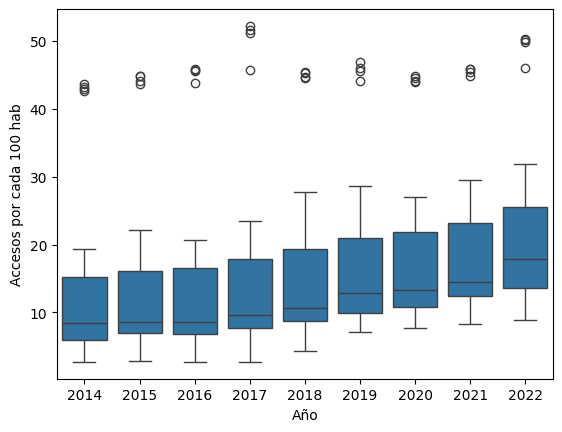

In [138]:
sns.boxplot(x='Año',y='Accesos por cada 100 hab', data = df)

En este gráfico de cajas, se observan valores atípicos (outliers) en el rango de 40 a 50. Sin embargo, al analizar los datos provincia por provincia, se evidencia que estos valores atípicos corresponden a Capital Federal.

A continuación, procederemos a crear los gráficos de cajas correspondientes para cada provincia con el fin de respaldar lo mencionado anteriormente:

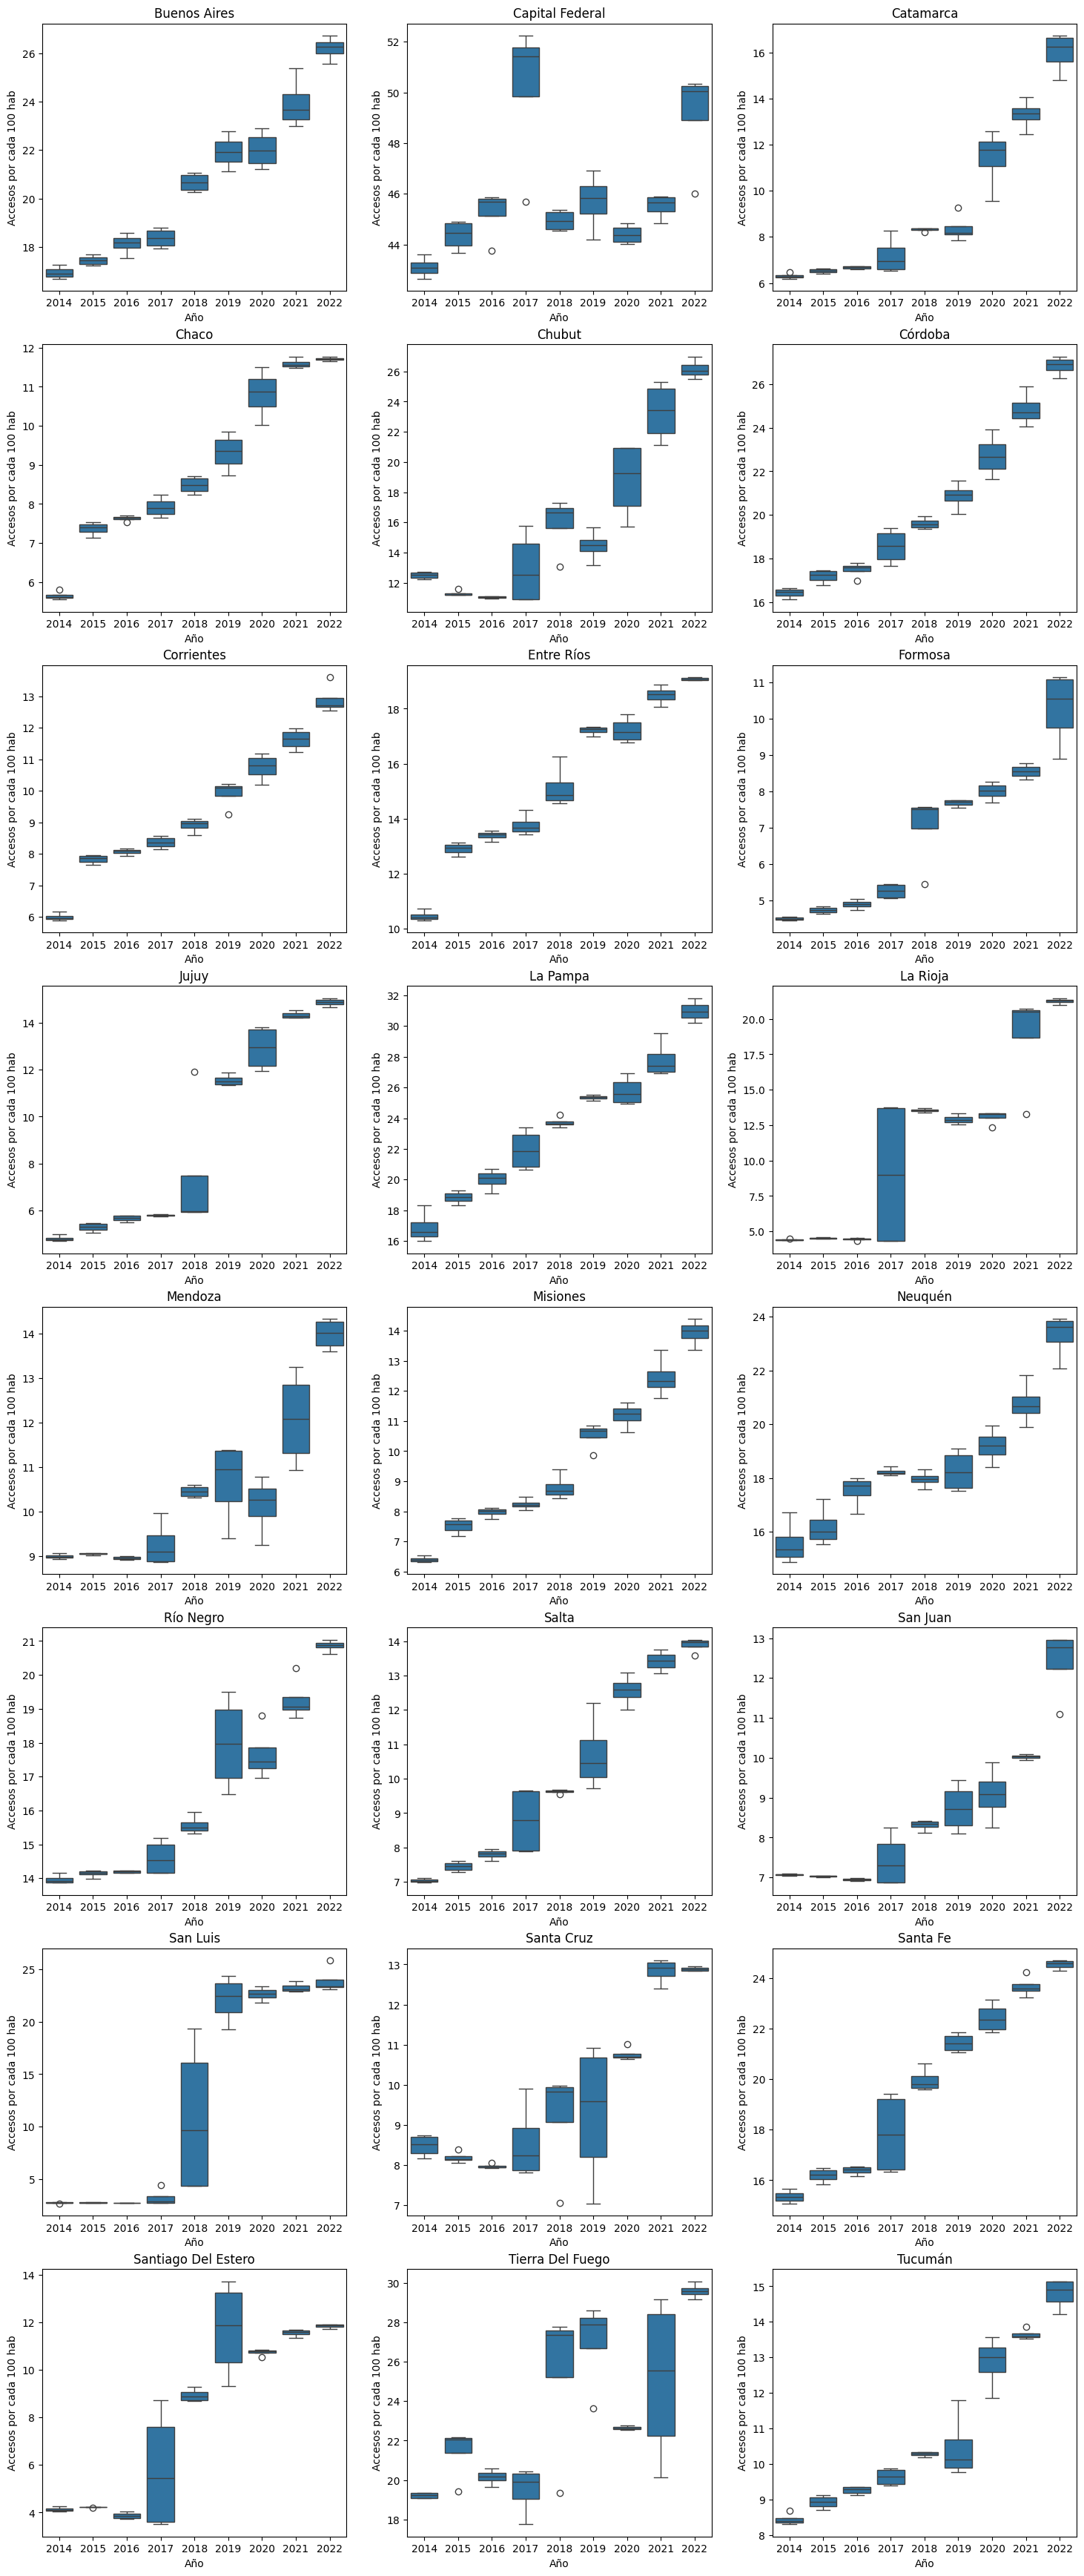

In [139]:
cantidad = 1
plt.figure(figsize=(18,44))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.boxplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Accesos por cada 100 hab')
    plt.title(f'{provincia}')
    cantidad+=1

plt.show()

En los gráficos, podemos apreciar la presencia de muy pocos valores atípicos para su análisis.

#### A lo largo de los años, el promedio acceso por cada 100 habitantes de las provincias.

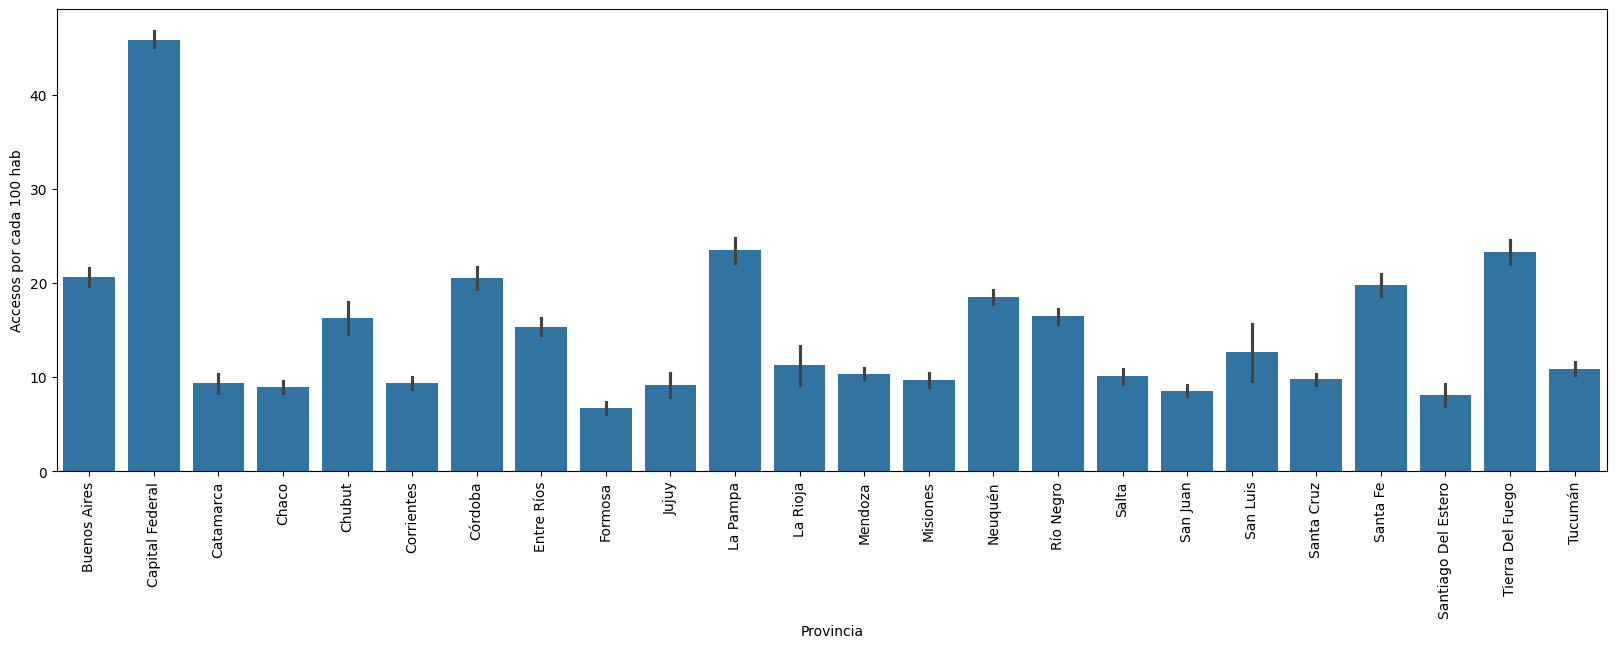

In [140]:
plt.figure(figsize=(20,6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hab', data=df)
plt.xticks(rotation = 90)
plt.show()

En este gráfico de barras, se representa la media anual de acceso a Internet por cada 100 habitantes en todas las provincias. Cada barra representa la media de conectividad a lo largo todos los años, lo que nos permite visualizar la tendencia general de acceso a Internet en todas las provincias en el transcurso del 2014 al 2022.

#### Analisis por provincias por años y trimestres

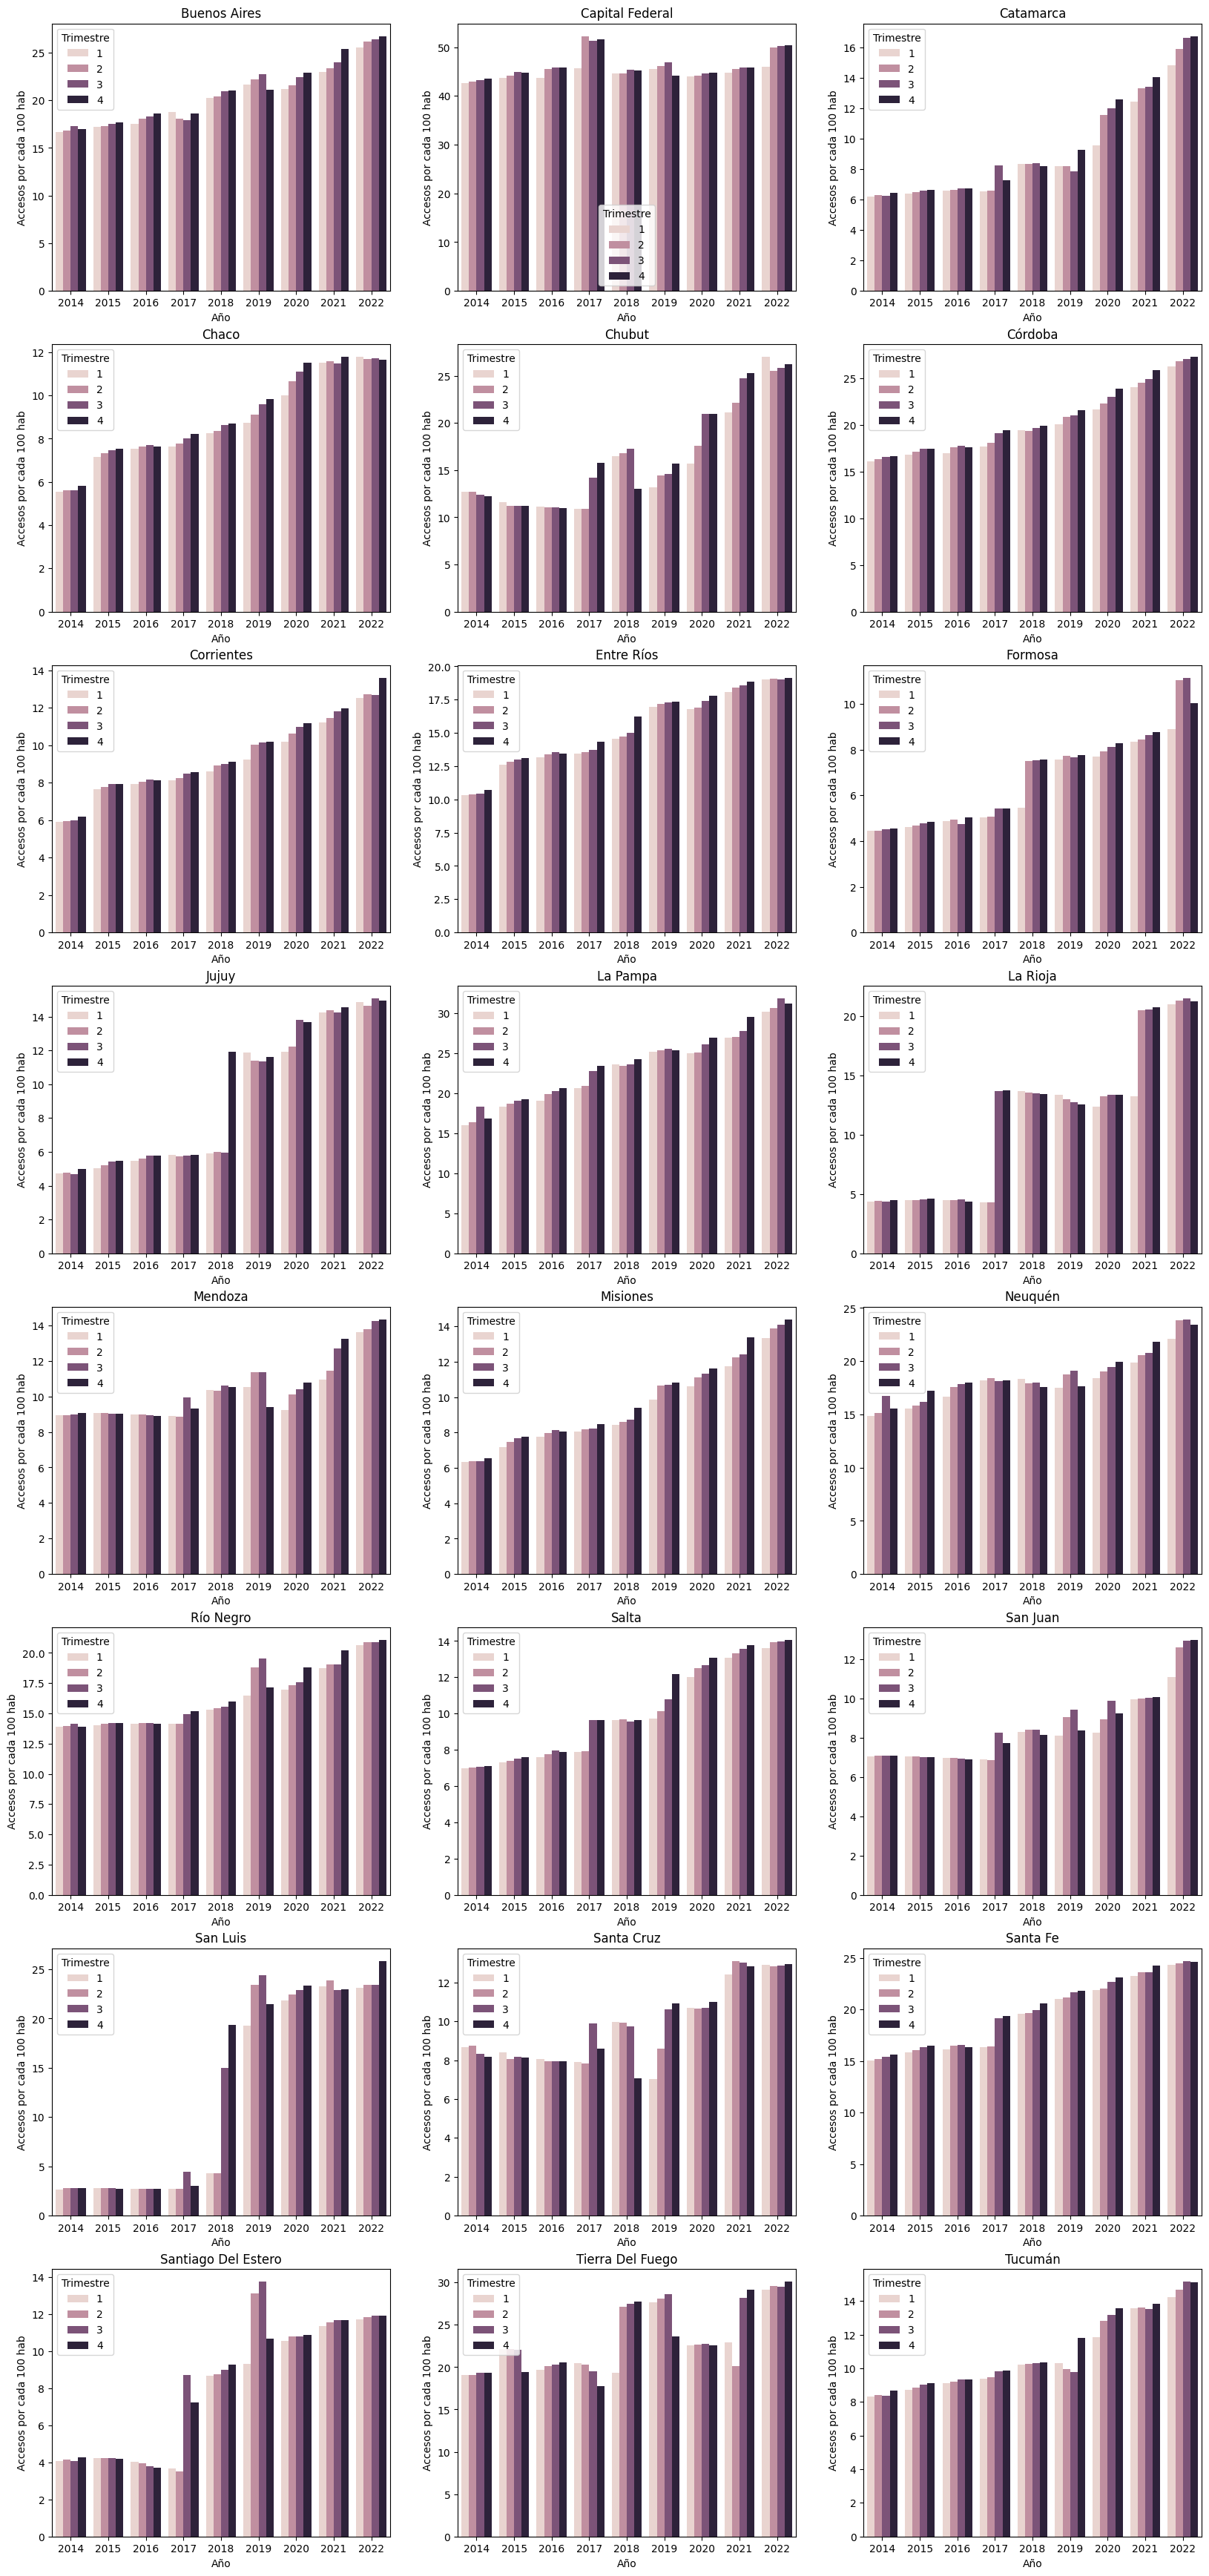

In [141]:
cantidad = 1
plt.figure(figsize=(20,44))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.barplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Accesos por cada 100 hab', hue='Trimestre')
    plt.title(f'{provincia}')
    cantidad+=1

plt.show()

Al analizar provincia por provincia, podemos identificar saltos significativos en el gráfico de barras, lo cual es de particular interés. Estos saltos representan áreas de oportunidad que merecen un estudio más detallado. Por ejemplo, en provincias como San Luis, La Rioja y Santiago del Estero, observamos un incremento notorio en la métrica de acceso a Internet por cada 100 habitantes.

Estos hallazgos nos brindan valiosas pistas sobre las estrategias exitosas que se están aplicando en ciertas provincias para mejorar esta métrica. Este análisis puede servir como punto de partida para investigar las políticas, inversiones en infraestructura y programas que han contribuido a estos avances. Posteriormente, podemos considerar la aplicación de medidas similares en otras provincias para elevar la conectividad y garantizar un acceso equitativo a Internet en todo el país.

In [142]:
df.to_csv('Datasets trabajados/Acceso_habitantes.csv', sep=';', index=False)

### Acceso por 100 hogares

In [10]:
df = pd.read_excel('Datasets/1_Internet_Penetracion.xlsx', sheet_name='Penetracion-hogares')
df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.940000
1,2022,4,Capital Federal,122.730000
2,2022,4,Catamarca,65.770000
3,2022,4,Chaco,43.620000
4,2022,4,Chubut,85.570000
...,...,...,...,...
859,2014,1,Santa Cruz,28.939093
860,2014,1,Santa Fe,47.847663
861,2014,1,Santiago Del Estero,16.309924
862,2014,1,Tierra Del Fuego,63.965926


Parecido al dataset anterior pero con la diferencia que se analizan por hogares en vez de habitantes, las columnas que tenemos son:

- **Año:** Representa el año al que corresponden los datos.
- **Trimestre:** Indica el trimestre al que pertenecen los datos.
- **Provincia:** Enumera las provincias de Argentina.
- **Accesos por cada 100 hogares:** Muestra la cantidad de accesos a Internet por cada 100 hogares en cada provincia.

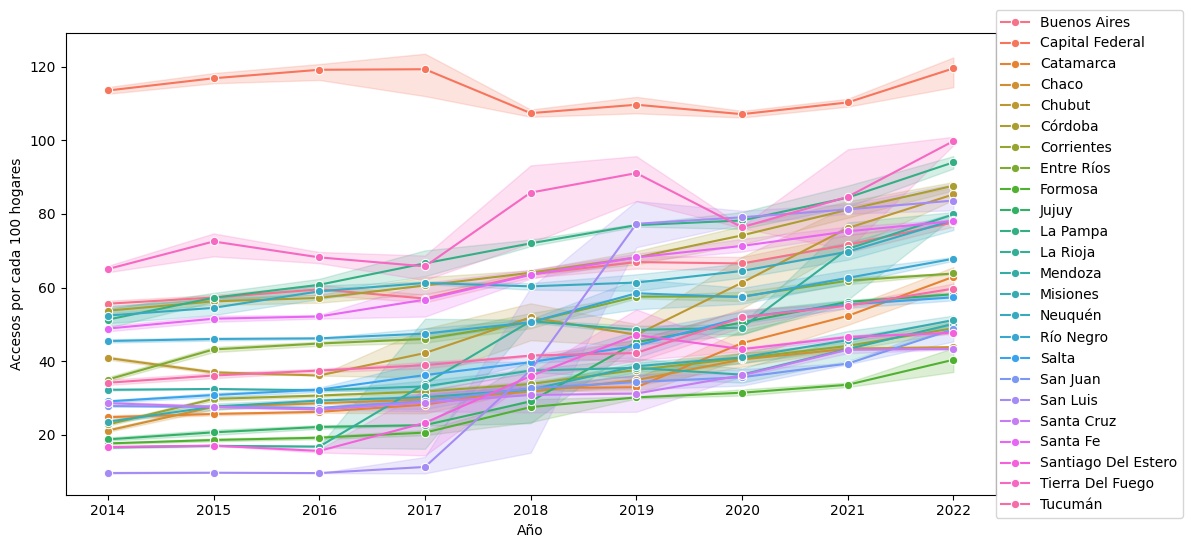

In [144]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Año',y='Accesos por cada 100 hogares', data = df, hue='Provincia', marker='o')
plt.legend(loc=(1,-0.05))
plt.show()

Este gráfico de líneas proporciona una representación visual de cómo ha evolucionado el acceso a Internet a lo largo de los años en diferentes provincias. Los ejes de coordenadas se utilizan de la siguiente manera:

- **Eje X:** Representa el tiempo, con los años dispuestos en orden cronológico.
- **Eje Y:** Muestra el acceso a Internet expresado como la cantidad de conexiones por cada 100 hogares en las provincias.

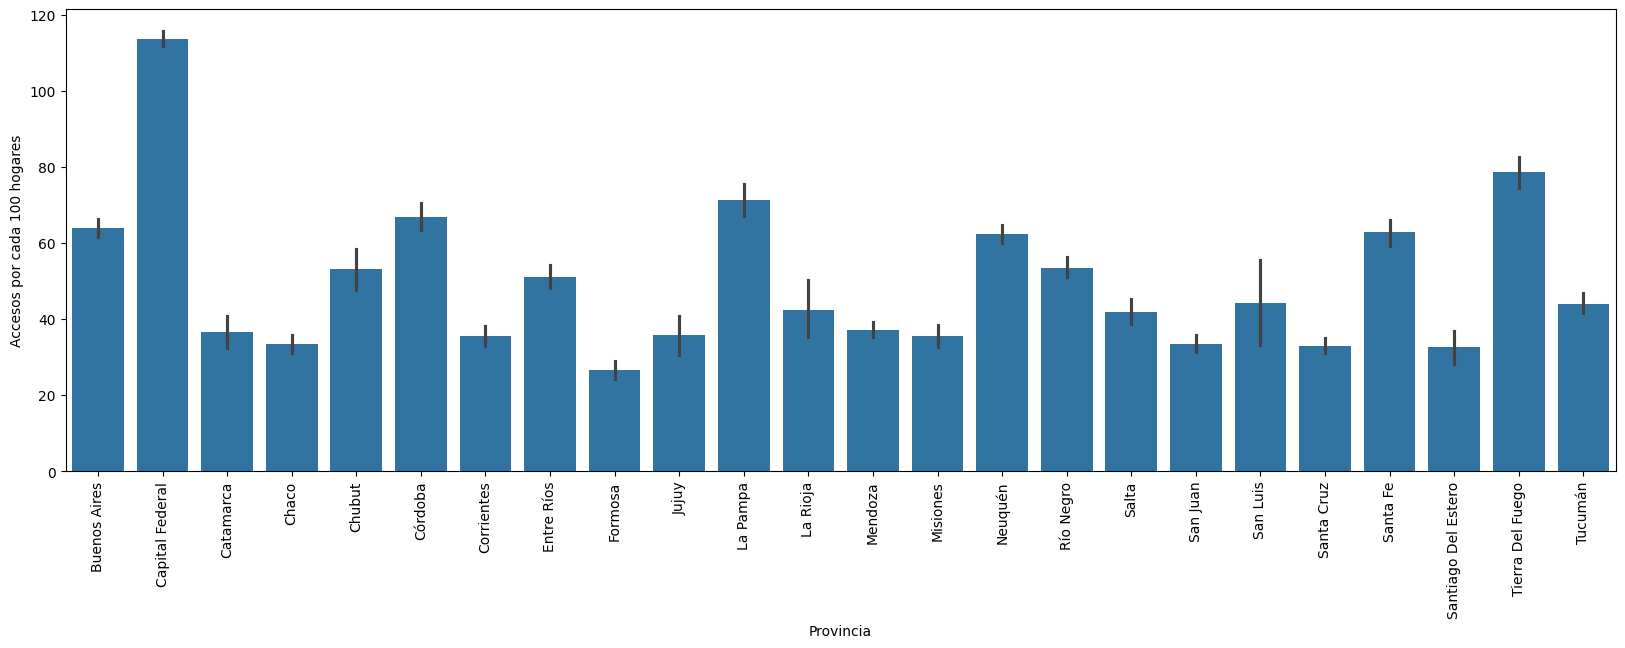

In [145]:
plt.figure(figsize=(20,6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=df)
plt.xticks(rotation = 90)
plt.show()

En este gráfico de barras, se representa la media anual de acceso a Internet por cada 100 hogares en todas las provincias. Cada barra representa la media de conectividad a lo largo de varios años, lo que nos permite visualizar la tendencia general de acceso a Internet en todas las provincias en el transcurso del 2014 al 2022.

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

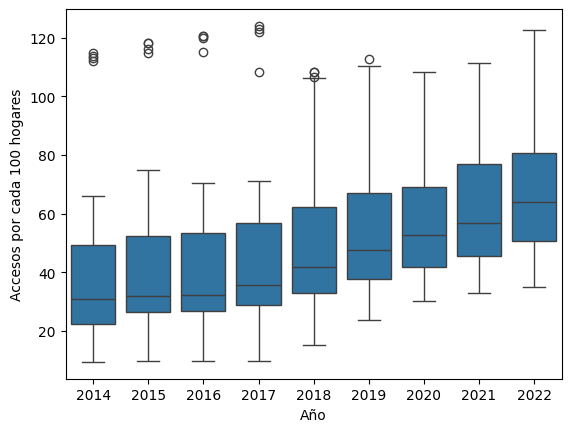

In [146]:
sns.boxplot(x='Año',y='Accesos por cada 100 hogares', data = df)

En este diagrama de cajas, se identifican valores anómalos (outliers) en el intervalo de 100 a 120. No obstante, al examinar detenidamente los datos por provincia, se constata que estos valores excepcionales también están presentes en Capital Federal, como se observó en el gráfico anterior con la métrica previamente mencionada.

A continuación, continuaremos generando gráficos de cajas individuales para cada provincia con el objetivo de reforzar la observación anterior:

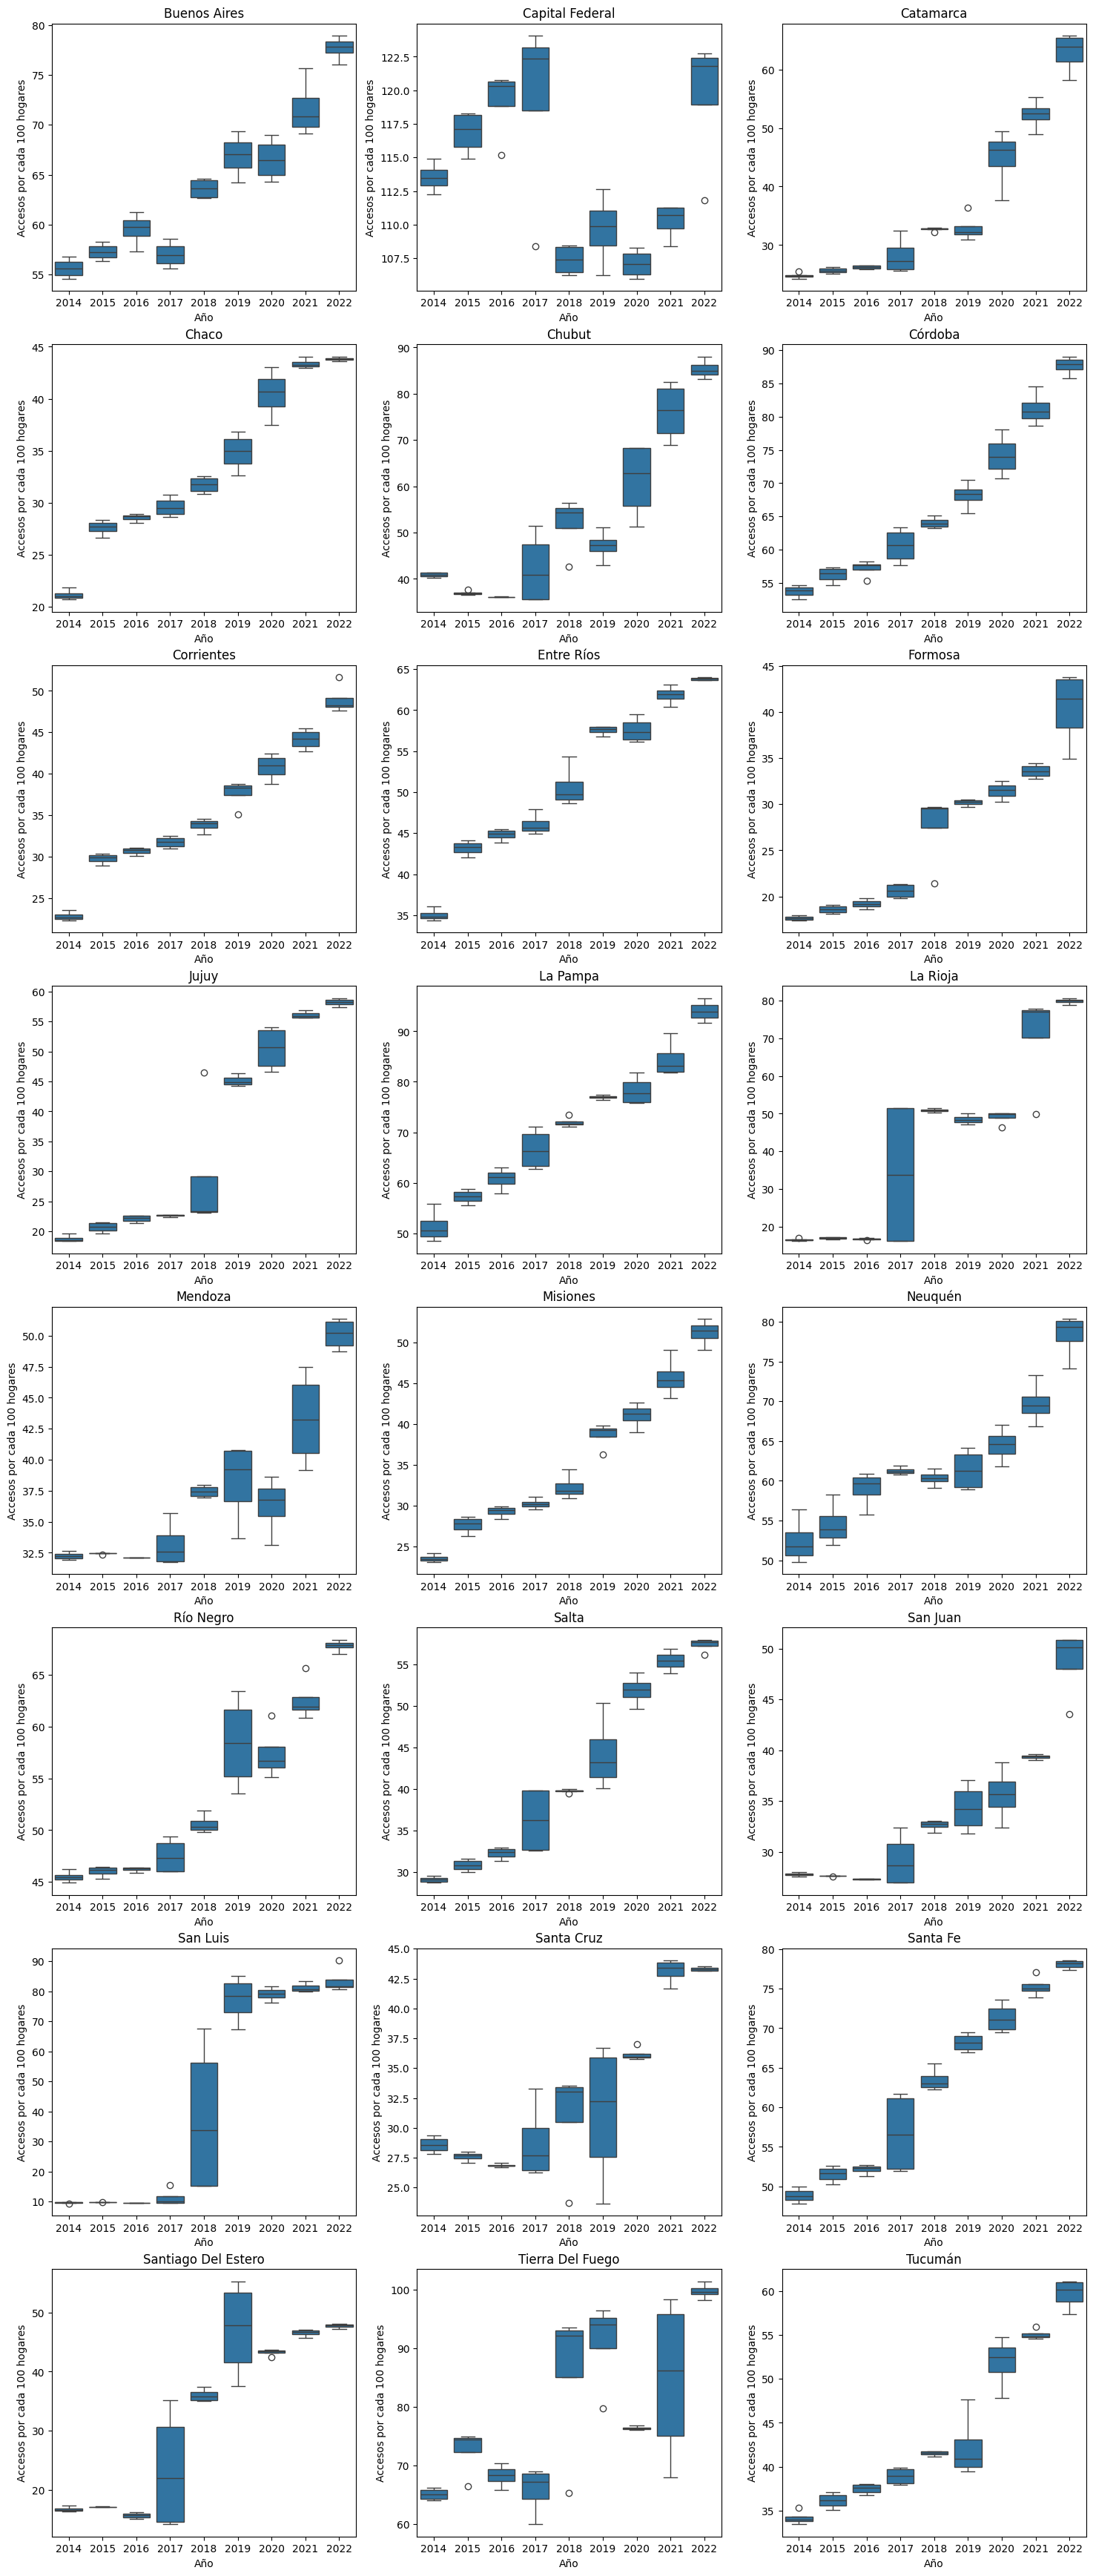

In [147]:
cantidad = 1
plt.figure(figsize=(18,44))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.boxplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Accesos por cada 100 hogares')
    plt.title(f'{provincia}')
    cantidad+=1

plt.show()

Al igual que con la métrica de los 100 habitantes, es posible identificar valores atípicos en el gráfico general que abarca todas las provincias. Sin embargo, cuando llevamos a cabo un análisis detallado provincia por provincia, estos valores atípicos desaparecen. Esta observación sugiere que, a nivel provincial, las discrepancias o variaciones excepcionales en la métrica tienden a nivelarse o encontrar explicaciones locales. Este análisis más granular nos permite comprender mejor la dinámica de la métrica en cada región y resaltar la importancia de considerar el contexto provincial al evaluar estos datos.

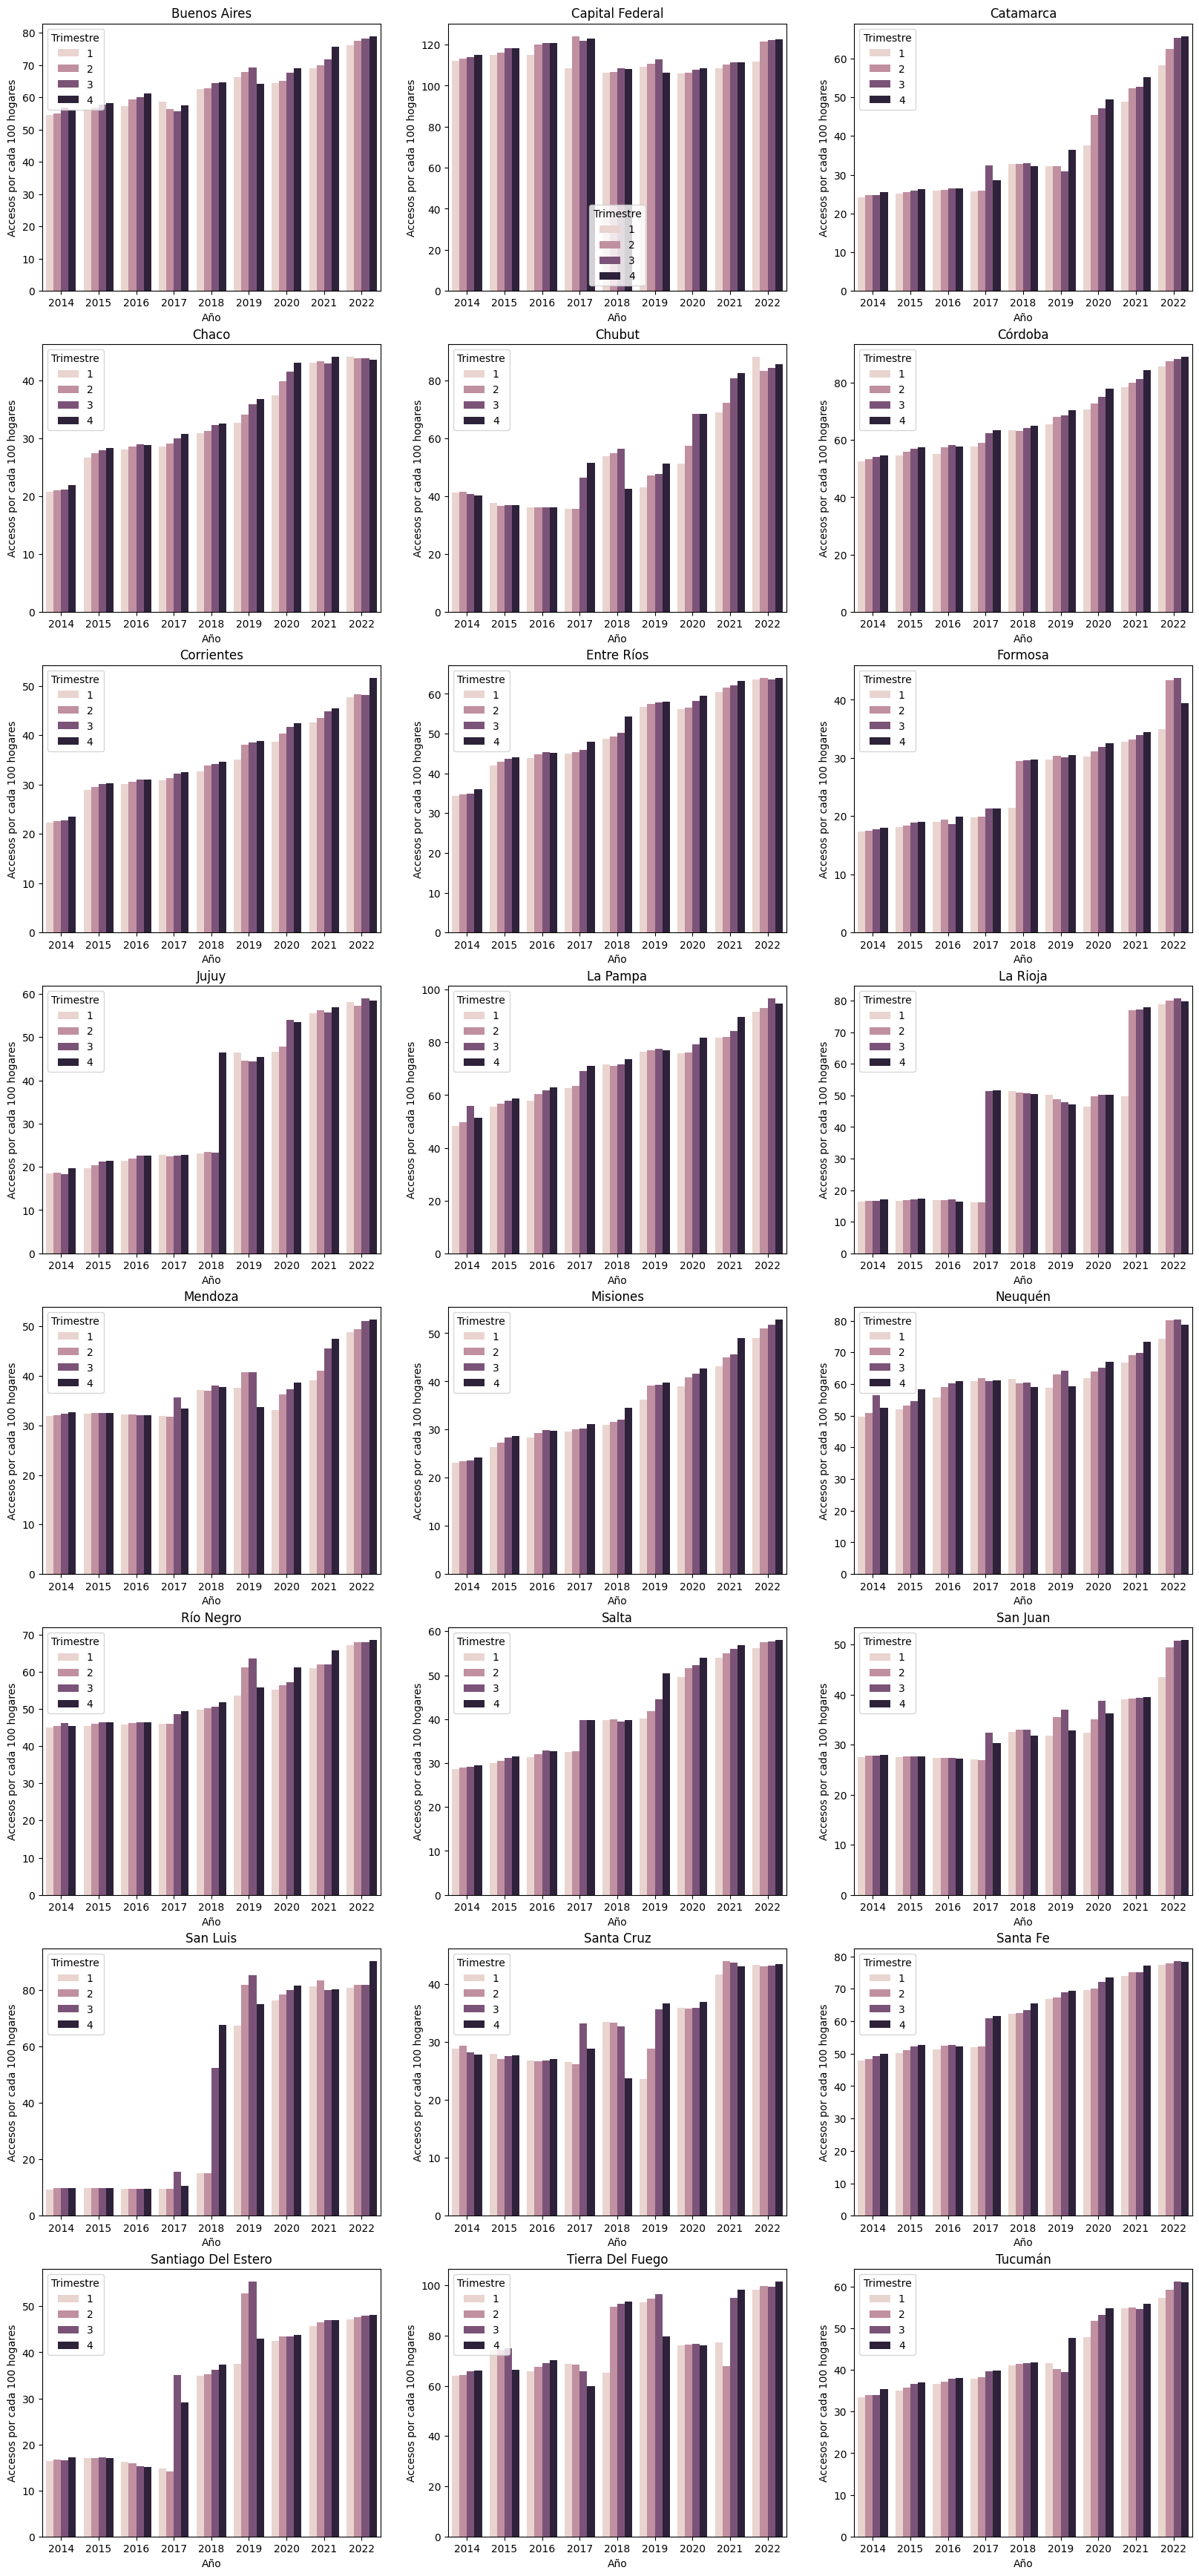

In [148]:
cantidad = 1
plt.figure(figsize=(20,44))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.barplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Accesos por cada 100 hogares', hue='Trimestre')
    plt.title(f'{provincia}')
    cantidad+=1

plt.show()

Al igual que con la metrica antes vista, al analizar provincia por provincia, podemos identificar saltos significativos en el gráfico de barras, lo cual es de particular interés. Estos saltos representan áreas de oportunidad que merecen un estudio más detallado. Por ejemplo, en provincias como San Luis, La Rioja y Jujuy, observamos un incremento notorio en la métrica de acceso a Internet por cada 100 hogares.

KPI
Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [27]:
ultimoAñoYTrimestre = df[(df['Año'] == 2022) & (df['Trimestre'] == 4)].copy()
mas2 = []
for metrica in ultimoAñoYTrimestre['Accesos por cada 100 hogares']:
    mas2.append(((metrica*2)/100) + metrica)

ultimoAñoYTrimestre['Mejorar 2K'] = mas2

ultimoAñoYTrimestre.to_csv('Datasets trabajados/Mejora KPI.csv', sep=';', index=False)

In [149]:
df.to_csv('Datasets trabajados/Acceso_hogares.csv', sep=';', index=False)

### Total a lo largo del pais

In [150]:
df = pd.read_excel('Datasets/1_Internet_Penetracion.xlsx', sheet_name='Penetracion-totales')
df

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.210000,24.150000,Oct-Dic 2022
1,2022,3,76.640000,23.950000,Jul-Sept 2022
2,2022,2,75.965424,23.720442,Abr-Jun 2022
3,2022,1,73.878803,23.049171,Ene-Mar 2022
4,2021,4,73.176397,22.810702,Oct-Dic 2021
5,2021,3,70.578853,21.982550,Jul-Sept 2021
6,2021,2,69.240183,21.547939,Abr-Jun 2021
7,2021,1,67.945876,21.127832,Ene-Mar 2021
8,2020,4,67.622339,21.010192,Oct-Dic 2020
9,2020,3,66.310000,20.590000,Jul-Sept 2020


Este conjunto de datos combina los datos anteriores sin desglosar por provincias, proporcionando una visión general de las métricas de acceso a Internet por cada 100 habitantes y cada 100 hogaresa lo largo de los años y trimestres.

#### Grafico por año de acceso por cada 100 hogares en Argentina

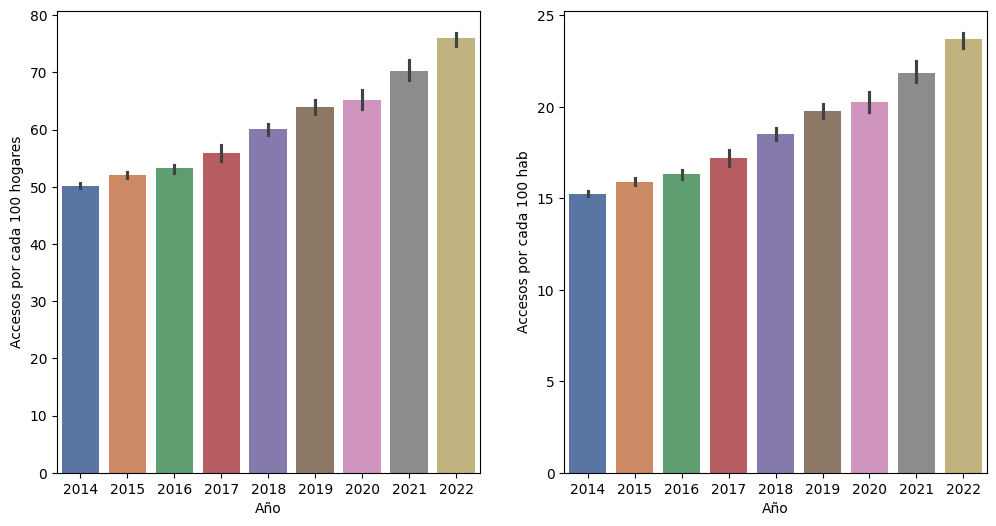

In [151]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x='Año', data =df, y='Accesos por cada 100 hogares', palette='deep', hue='Año',legend=False)
plt.subplot(1,2,2)
sns.barplot(x='Año', data =df, y='Accesos por cada 100 hab', palette='deep', hue='Año', legend=False)
plt.show()

Podemos notar que, a pesar de las diferencias entre las provincias, como mencionamos anteriormente, al analizar la suma de todas ellas a lo largo de los años, se evidencia una clara tendencia al aumento de las métricas. Esto sugiere que con el paso del tiempo, se está incrementando el acceso a Internet en los hogares y la conectividad por habitante.

In [152]:
#KPI TENER un promedio de 90 personas con acceso cada 100 hogares en el proximo año oaaaaaaa
#KPI TENER un promedio de 30 personas con acceso cada 100 hab en el proximo año oaaaaaaa

#### Outliers

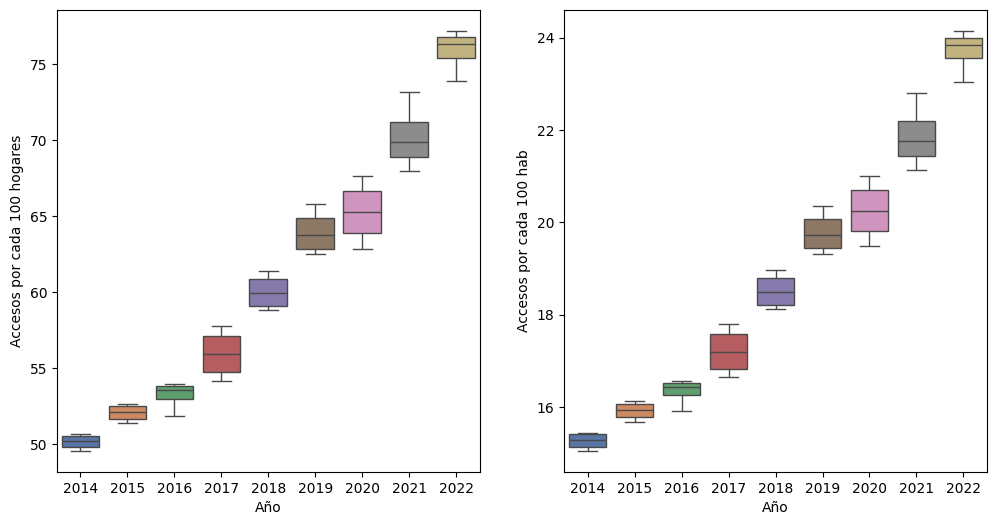

In [153]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='Año', data =df, y='Accesos por cada 100 hogares', palette='deep', hue='Año',legend=False)
plt.subplot(1,2,2)
sns.boxplot(x='Año', data =df, y='Accesos por cada 100 hab', palette='deep', hue='Año', legend=False)
plt.show()

Al examinar el gráfico de cajas, no se aprecia la presencia de ningún valor atípico que justifique un análisis adicional.

In [154]:
df.to_csv('Datasets trabajados/total_Acceso.csv', sep=';', index=False)

## Dataset: Internet BAF

In [3]:
df = pd.read_excel('Datasets/2_Internet_BAF.xlsx')
df

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26304,460.0,26764
860,2014,1,Santa Fe,506000,612.0,506612
861,2014,1,Santiago Del Estero,37124,9.0,37133
862,2014,1,Tierra Del Fuego,27272,766.0,28038


Este dataset muestra información recopilada a lo largo de varios años y trimestres en Argentina sobre la conectividad a Internet en diversas provincias del país. Los atributos incluidos en el conjunto de datos son:

* Año: El año en el que se recopiló la información.
* Trimestre: El trimestre en el que se recopilaron los datos (por ejemplo, 1 para el primer trimestre, 2 para el segundo trimestre, y así sucesivamente).
* Provincia: El nombre de la provincia en Argentina donde se realizó la medición de conectividad a Internet.
* Banda ancha fija: La cantidad de conexiones a Internet de banda ancha fija en la provincia para el año y trimestre especificados.
* Dial up: La cantidad de conexiones a Internet Dial-up (conexiones más lentas) en la provincia para el año y trimestre mencionados.
* Total: El total de conexiones a Internet en la provincia para el año y trimestre correspondiente, que es la suma de las conexiones de banda ancha fija y Dial-up.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


Vemos que tenemos 2 nulos en dial up

In [7]:
df[df['Dial up'].isna()]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


Los nulos para seguir el total que figura en la columna deberian ser 0, por ende realizamos un fillna.

In [8]:
df.fillna(0, inplace=True)

Ponemos la columna provincias como category.

In [156]:
df['Provincia'] = df['Provincia'].astype('category')

#### Grafico a lo largo de todo el pais

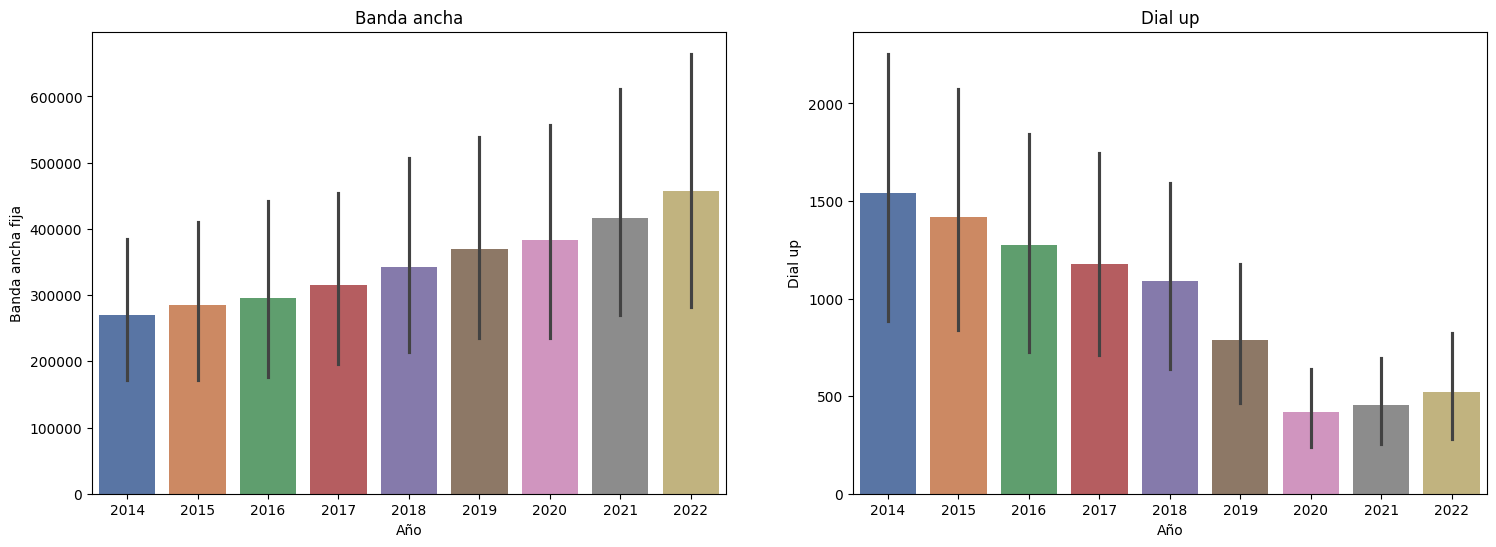

In [157]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x='Año', y='Banda ancha fija', data = df, hue='Año', palette='deep', legend=False)
plt.title('Banda ancha')

plt.subplot(1,2,2)
sns.barplot(x='Año', y='Dial up', data = df, hue='Año', palette='deep', legend=False)
plt.title('Dial up')

plt.show()

Es notorio que existe una notoria disparidad en la cantidad de usuarios entre la banda ancha y Dial-up, y esta brecha se debe principalmente a las marcadas diferencias en la velocidad de conexión entre estos dos tipos de servicios. La banda ancha fija representa una tecnología de conexión a Internet significativamente más rápida, confiable y estable en comparación con el Dial-up, a pesar de ser generalmente más costosa. Por otro lado, el Dial-up es una alternativa más económica, pero a expensas de velocidades de conexión considerablemente más lentas y una menor estabilidad en la conexión.

Es importante destacar que, a medida que transcurre el tiempo, se ha observado una disminución gradual en la utilización del servicio de conexión Dial-up, por lo antes mencionado. 

In [158]:
# KPI para el 2023 reducir el uso de Dial Up un 10% por banda ancha para proveer mejor servicio a los clientes.

In [9]:
df.to_csv('Datasets trabajados/Internet_BAF.csv', sep=';', index=False)

## Dataset: Internet acceso por tecnologia

In [160]:
df = pd.read_excel('Datasets/3_Internet_Accesos-por-tecnologia.xlsx')
df

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
5,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021
6,2021,2,2018587,5641731,1472246,476968,253552,9863084,Abr-Jun 2021
7,2021,1,2175211,5424782,1362976,434548,250455,9647972,Ene-Mar 2021
8,2020,4,2213949,5371824,1311199,421554,253036,9571562,Oct-Dic 2020
9,2020,3,2263889,5259351,1170879,413259,248821,9356199,Jul-Sept 2020


Este conjunto de datos proporciona información sobre el tipo de tecnologia para el acceso a Internet en Argentina durante 2014-2022 separados en trimestres. Los atributos en el conjunto de datos son los siguientes:

* Año: El año en que se recopilaron los datos.
* Trimestre: El trimestre específico dentro del año.
* ADSL: El número de conexiones de Internet por ADSL en ese período.
* Cablemodem: El número de conexiones de Internet por Cablemódem en ese período.
* Fibra óptica: El número de conexiones de Internet por Fibra óptica en ese período.
* Wireless: El número de conexiones de Internet inalámbricas en ese período.
* Otros: El número de conexiones de Internet de otros tipos en ese período.
* Total: El total de conexiones de Internet en ese período, que es la suma de todas las categorías mencionadas.
* Periodo: El rango de tiempo al que se refiere ese trimestre, como "Ene-Mar 2024" o "Jul-Sept 2022". Dato que no me parece importante para su analisis, porque no me brinda informacion extra.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


Podemos observar que no tenemos ningun nulo.

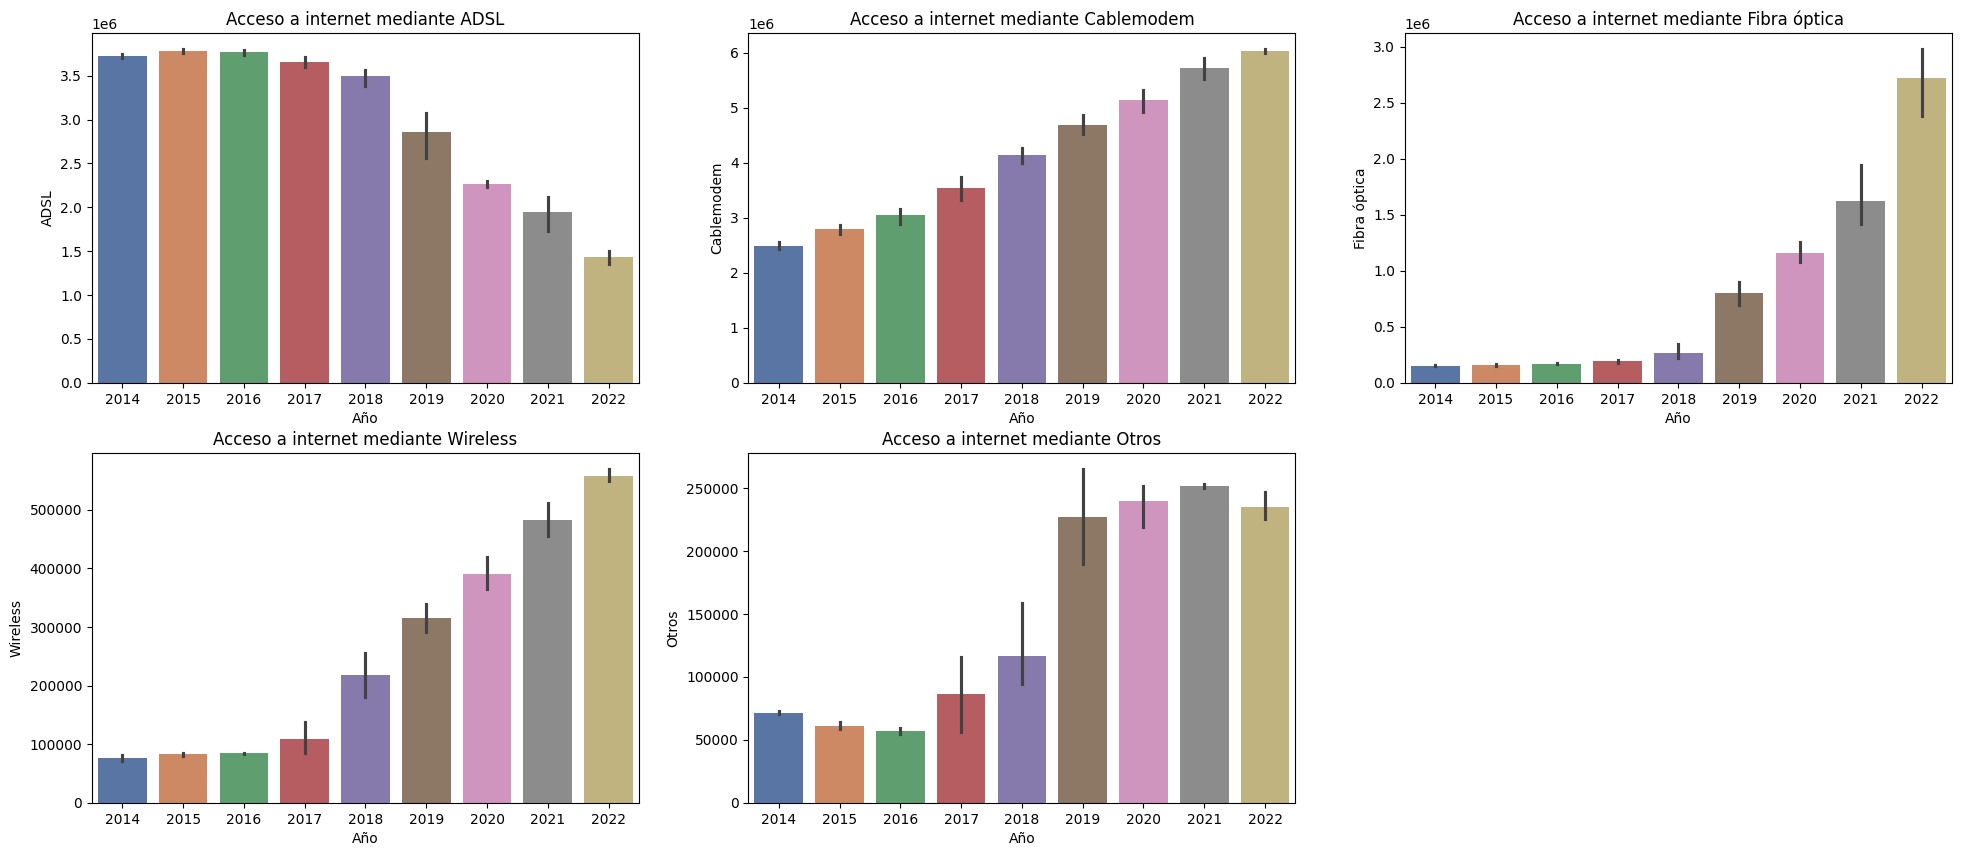

In [162]:
plt.figure(figsize=(24,10))
plt.subplot(2,3,1)
sns.barplot(x='Año', y='ADSL', data = df, palette='deep', legend = False, hue='Año')
plt.title('Acceso a internet mediante ADSL')
plt.subplot(2,3,2)

sns.barplot(x='Año', y='Cablemodem', data = df, palette='deep', legend = False, hue='Año')
plt.title('Acceso a internet mediante Cablemodem')
plt.subplot(2,3,3)

sns.barplot(x='Año', y='Fibra óptica', data = df, palette='deep', legend = False, hue='Año')
plt.title('Acceso a internet mediante Fibra óptica')
plt.subplot(2,3,4)

sns.barplot(x='Año', y='Wireless', data = df, palette='deep', legend = False, hue='Año')
plt.title('Acceso a internet mediante Wireless')
plt.subplot(2,3,5)

sns.barplot(x='Año', y='Otros', data = df, palette='deep', legend = False, hue='Año')
plt.title('Acceso a internet mediante Otros')
plt.show()


El ADSL, una tecnología de acceso a Internet a través de líneas telefónicas de cobre, fue pionera en proporcionar velocidades más rápidas que las conexiones de módem dial-up. Sin embargo, con el tiempo, tecnologías más avanzadas han ganado protagonismo. El cablemódem, que utiliza redes de televisión por cable, ha ofrecido velocidades de Internet más rápidas que el ADSL.

La última evolución en la transferencia de Internet es la fibra óptica, que utiliza cables de fibra óptica para transmitir datos a velocidades extremadamente altas y con una gran estabilidad. Esta tecnología ha revolucionado la conectividad a Internet.

El gráfico de barras refleja cómo el ADSL muestra una disminución notable, en línea con la tendencia de disminución del Dial Up, mientras que la Banda Ancha y el Cablemódem están en aumento, lo que refleja la creciente demanda de velocidades más altas.

La introducción de la fibra óptica en Argentina ha acelerado la transición hacia tecnologías más avanzadas, especialmente en áreas urbanas. La inversión en infraestructura de fibra óptica indica su creciente importancia, ya que ofrece velocidades excepcionales y una experiencia de navegación sin interrupciones. La fibra óptica se perfila como el estándar del futuro, reemplazando progresivamente las tecnologías más antiguas. La competencia en el mercado de las telecomunicaciones ha impulsado estas mejoras en la conectividad a Internet, brindando a los usuarios opciones más rápidas y eficientes.

In [163]:
# KPI reducir un 5% el servicio de ADSL y Cablemodem aumentando y promoviendo el uso de Fibra optica. (??????????)

In [164]:
df.to_csv('Datasets trabajados/Accesos-por-tecnologia.csv', sep=';', index=False)

## Historico velocidad internet

In [165]:
df = pd.read_excel('Datasets/4_historico_velocidad_internet.xlsx')
df

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000000
1,2022,4,Capital Federal,182.860000
2,2022,4,Catamarca,83.330000
3,2022,4,Chaco,104.020000
4,2022,4,Chubut,15.920000
...,...,...,...,...
859,2014,1,Santa Cruz,3.315991
860,2014,1,Santa Fe,3.147407
861,2014,1,Santiago Del Estero,2.949472
862,2014,1,Tierra Del Fuego,3.446888


Este contiene información sobre la velocidad promedio de descarga de conexiones a Internet en diferentes provincias de Argentina a lo largo de varios años y trimestres. Cada columna tiene:

* Año: Esta columna indica el año en el que se recopiló la información sobre la velocidad de Internet. Va desde 2014 hasta 2022.
* Trimestre: Esta columna indica el trimestre del año al que se refiere la información. Cada año se divide en cuatro trimestres, por lo que hay un total de 4 trimestres por año.
* Provincia: En esta columna se detalla la provincia de Argentina a la que pertenecen los datos de velocidad de Internet.
* Mbps (Media de bajada): Esta columna contiene el valor de la velocidad promedio de descarga de Internet en la provincia y trimestre correspondiente. La velocidad se mide en megabits por segundo (Mbps).

#### A continuacion vamos a ver el el promedio de las velocidades de internet de las provincias a lo largo de los años:

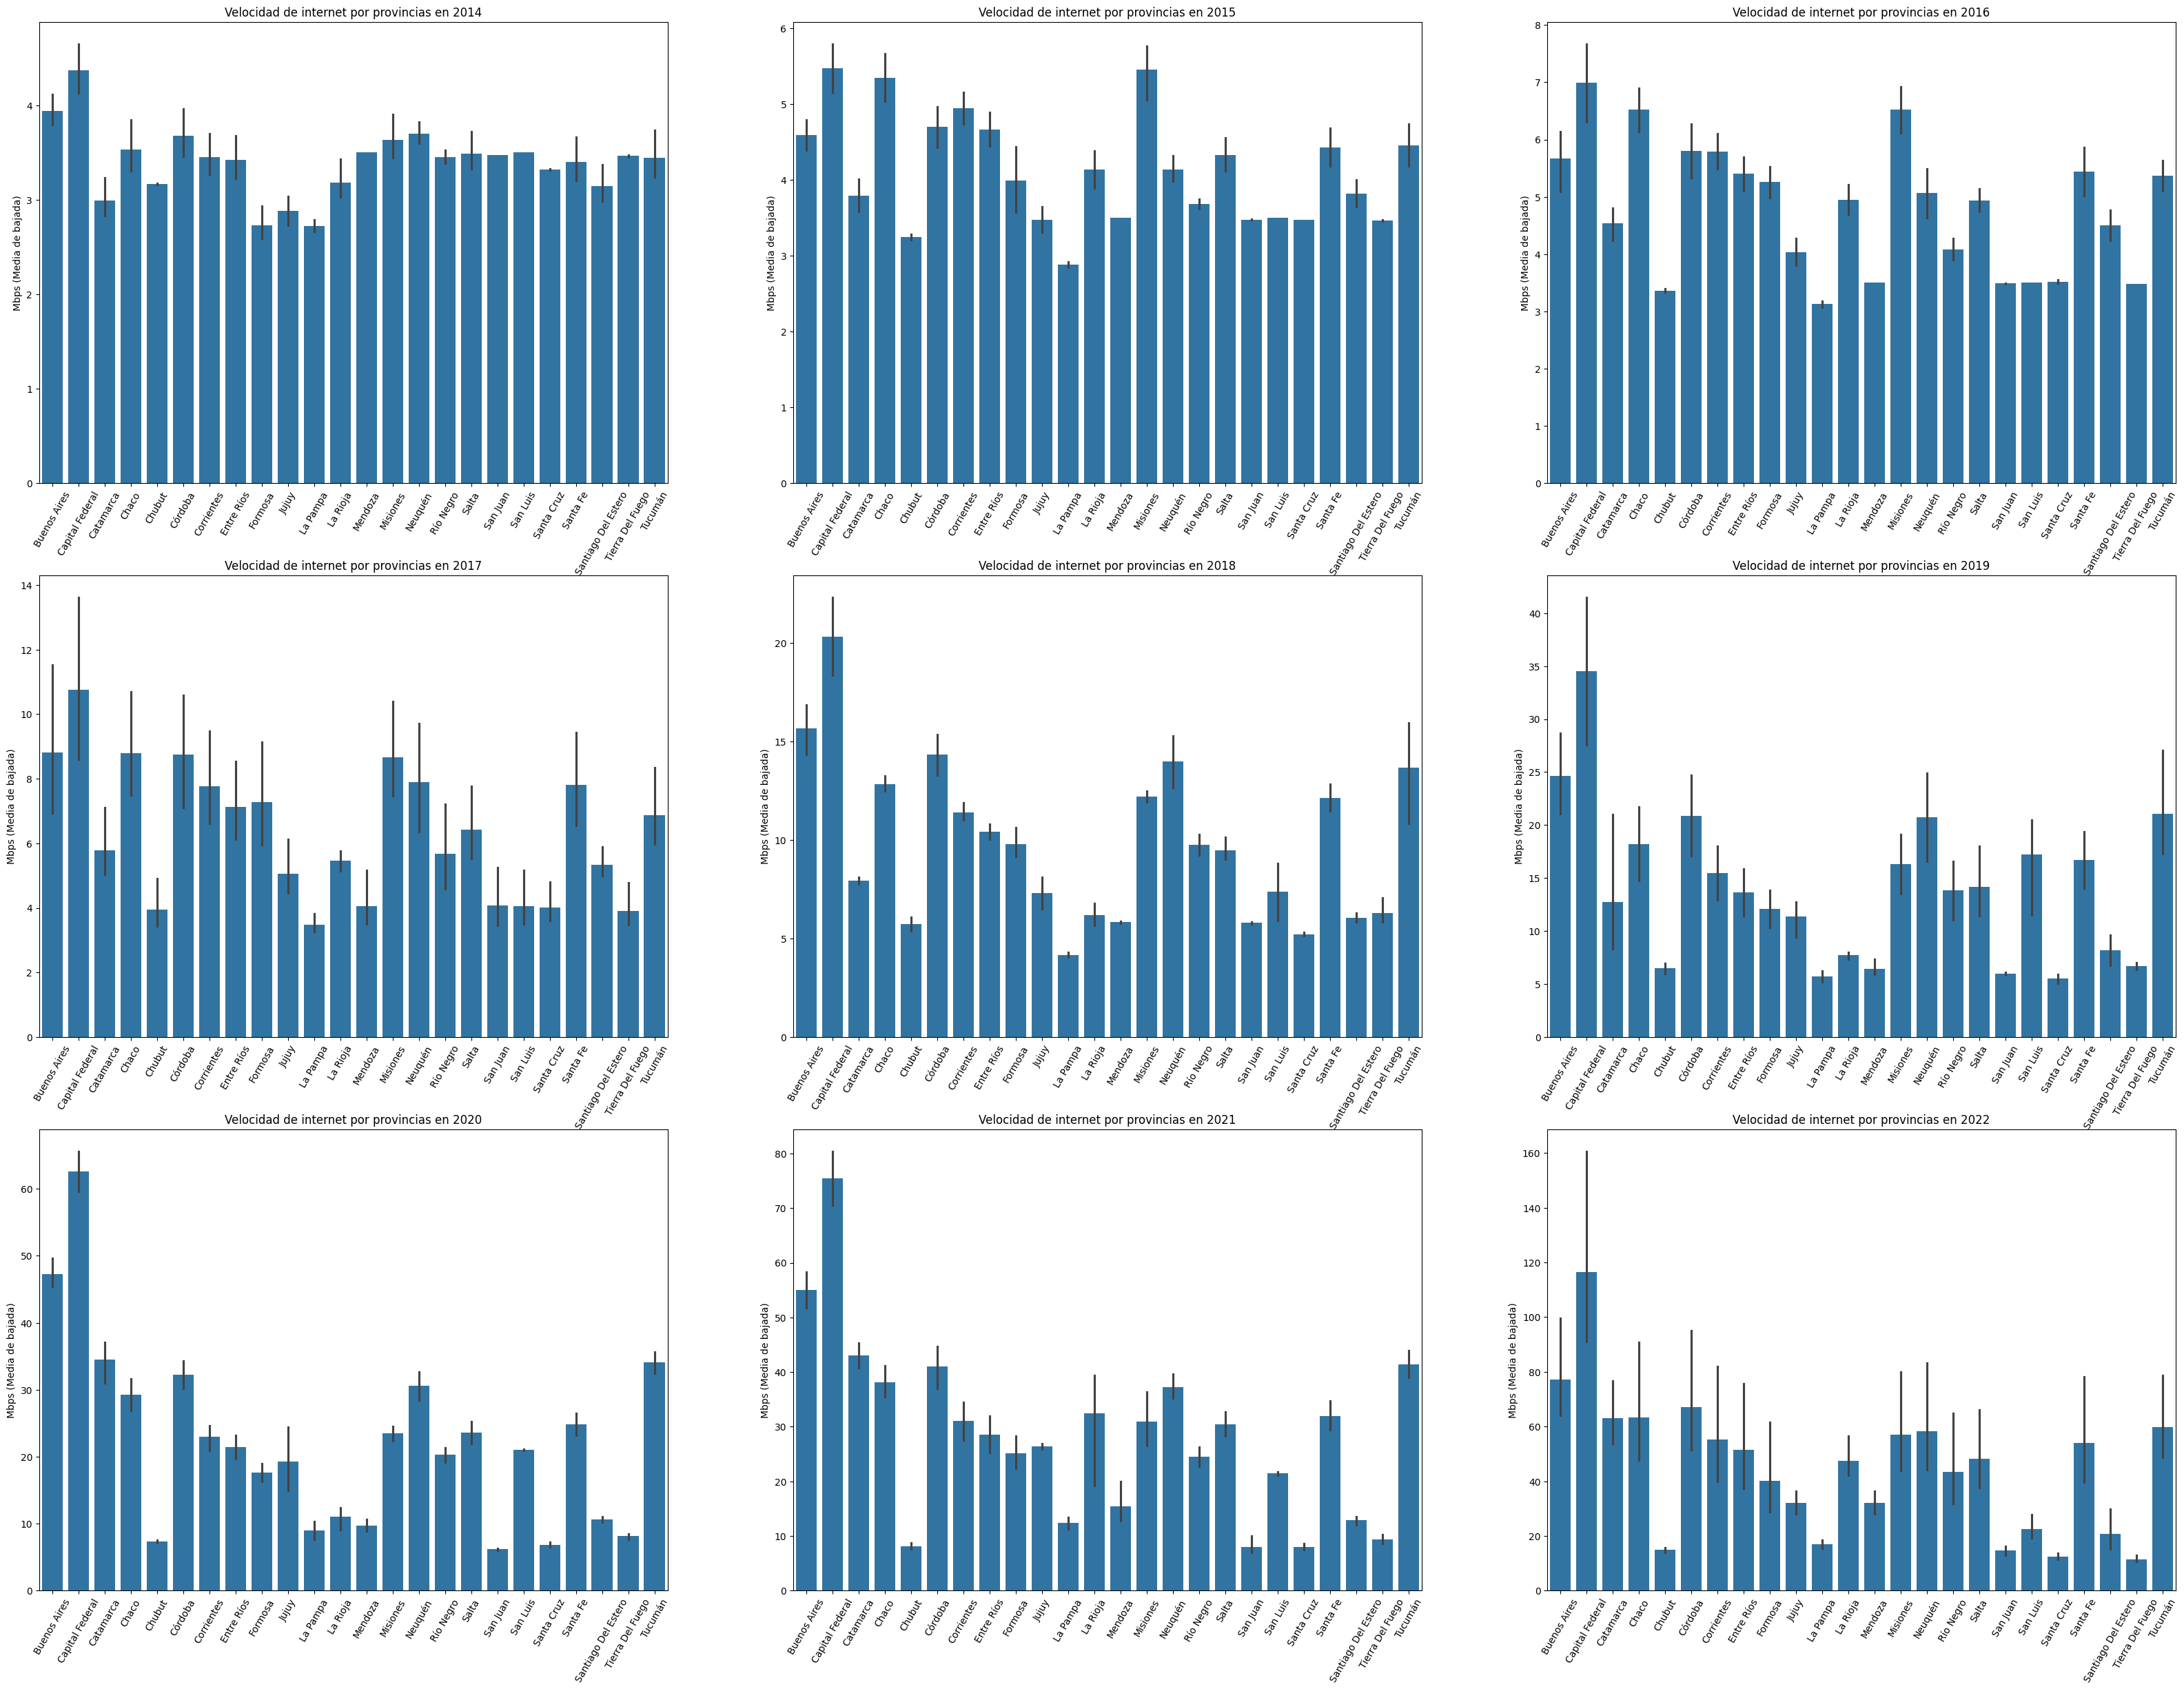

In [166]:
cantidad = 1
plt.figure(figsize=(40,40))
for año in sorted(df['Año'].unique().tolist()):
    plt.subplot(4,3,cantidad)
    sns.barplot(data = df[df['Año'] == año], y = 'Mbps (Media de bajada)', x = 'Provincia')
    plt.xticks(rotation=60)
    plt.title(f'Velocidad de internet por provincias en {año}')
    plt.xlabel('')
    cantidad += 1
plt.show()

En los gráficos, se evidencia claramente cómo la velocidad de descarga en megabits por segundo (Mbps) ha experimentado un aumento en la mayoría de las provincias a lo largo de los años. No obstante, también es notorio que algunas provincias, como Chubut, han mantenido una velocidad de Internet relativamente constante sin experimentar un crecimiento significativo en comparación con otras regiones. Esta información visual permite identificar las disparidades en la evolución de la velocidad de Internet entre las provincias.

In [167]:
porcentaje = pd.DataFrame()
años = sorted(df['Año'].unique().tolist())[:-1]
provincias = df['Provincia'].unique().tolist()
listaProvincias= []
promedioDeMejora = []
listaDeAños = []
for provincia in provincias:
    promedios = df[df['Provincia'] == provincia].groupby('Año')['Mbps (Media de bajada)'].mean()
    for año in años:
        promedioDeMejora.append(round(((promedios[año+1] *100) / promedios[año]) - 100, 2))
        listaProvincias.append(provincia)
        listaDeAños.append(año + 1)

porcentaje['Provincia'] = listaProvincias
porcentaje['Año'] = listaDeAños
porcentaje['Mejora'] = promedioDeMejora 

porcentaje


,Provincia,Año,Mejora
0,Buenos Aires,2015,16.63
1,Buenos Aires,2016,23.41
2,Buenos Aires,2017,55.58
3,Buenos Aires,2018,77.44
4,Buenos Aires,2019,57.48
...,...,...,...
187,Tucumán,2018,99.20
188,Tucumán,2019,54.10
189,Tucumán,2020,61.60
190,Tucumán,2021,21.52


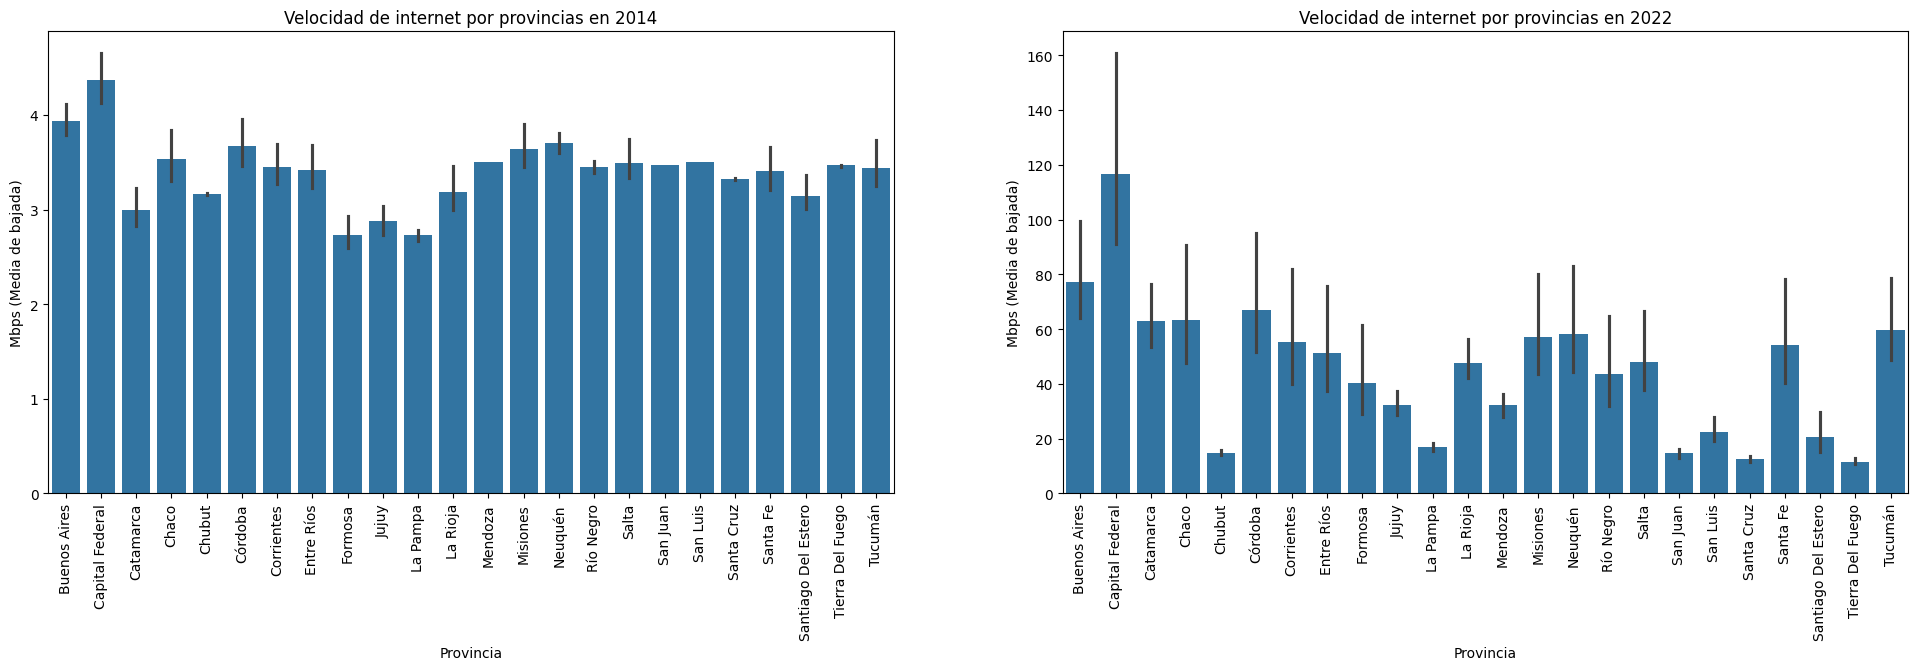

In [168]:
plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
sns.barplot(data = df[df['Año'] == 2014], y = 'Mbps (Media de bajada)', x = 'Provincia')
plt.xticks(rotation=90)
plt.title('Velocidad de internet por provincias en 2014')

plt.subplot(1,2,2)
sns.barplot(data = df[df['Año'] == 2022], y = 'Mbps (Media de bajada)', x = 'Provincia')
plt.xticks(rotation=90)
plt.title('Velocidad de internet por provincias en 2022')

plt.show()

En el gráfico de barras de la izquierda, correspondiente al año 2014, podemos observar que las velocidades de conexión en todas las provincias se encuentran equilibradas, manteniéndose en un rango de entre 3 y 4 MB. Sin embargo, al analizar el gráfico de la derecha correspondiente al año 2022, notamos una marcada disparidad en las velocidades promedio de las provincias. En este caso, la Capital Federal destaca por tener la velocidad más alta entre todas las provincias, mientras que otras, como Chubut, San Juan, Santa Cruz y Tierra del Fuego, se mantienen en niveles de velocidad notoriamente más bajos.

Esta discrepancia en las métricas de velocidad de conexión en 2022 es un punto de análisis importante. Se hace necesario investigar las causas subyacentes de estas diferencias. ¿Qué factores han contribuido a que la Capital Federal experimente un aumento significativo en la velocidad de conexión, mientras que otras provincias han mantenido velocidades bajas? Esta evaluación podría incluir aspectos como infraestructura de telecomunicaciones, inversión en tecnología, densidad de población y acceso a servicios de banda ancha. Un análisis más profundo permitirá identificar las razones detrás de estas disparidades y, posiblemente, sugerir soluciones para mejorar la equidad en el acceso a Internet en todas las provincias.

Podemos ver que desde el 2014 hasta el 2022 aumentaron bastante su velocidad a internet.

Provincias que estan por debajo de los 20 MB

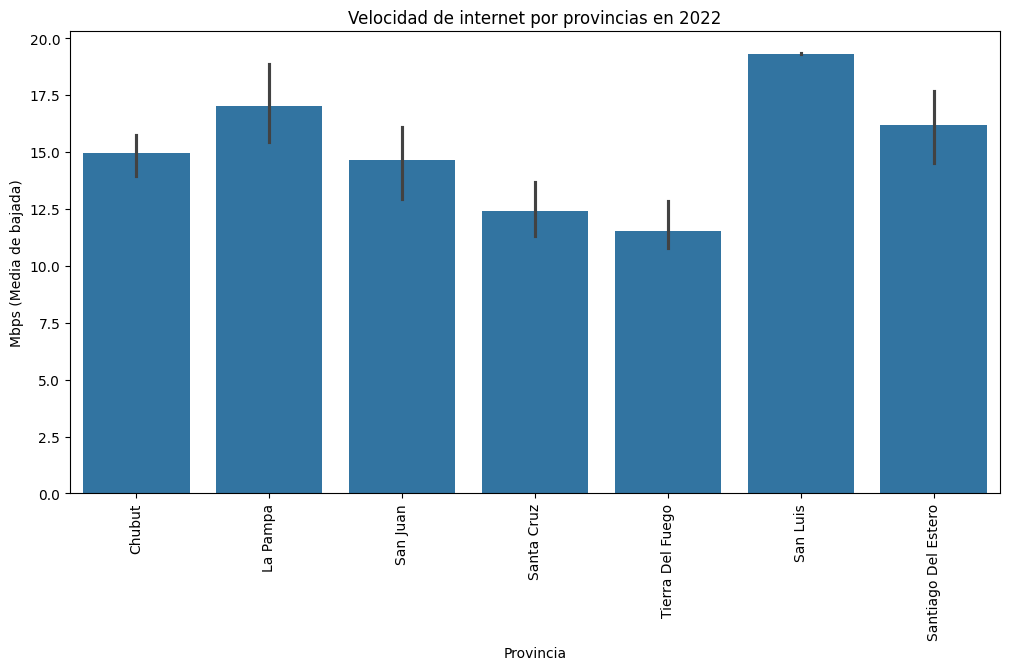

In [169]:
plt.figure(figsize=(12,6))
sns.barplot(data = df[(df['Año'] == 2022) & (df['Mbps (Media de bajada)'] < 20)], y = 'Mbps (Media de bajada)', x = 'Provincia')
plt.xticks(rotation=90)
plt.title('Velocidad de internet por provincias en 2022')

plt.show()

En este grafico, podemos identificar las provincias que aún presentan velocidades de conexión promedio por debajo de 20 Mbps. Estas provincias merecen una atención especial en términos de mejora de infraestructura y acceso a servicios de Internet de alta velocidad. Es importante considerar estrategias y políticas para elevar la calidad de la conectividad en estas regiones, garantizando que los ciudadanos tengan acceso a una conexión a Internet más rápida y confiable.

KPI MEJORAR EN UN 10% LA CANTIDAD DE MB QUE POSEEN LAS PROVINCIAS CON UN PROMEDIO DE 20 MB.

In [170]:
df.to_csv('Datasets trabajados/historico_velocidad.csv', sep=';', index=False)

## Mapa de conectividad

In [28]:
df = pd.read_excel(r'Datasets\9_mapa_conectividad.xlsx')
df

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.0,-35.520141,-60.998949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,86158,SI,SI,SI,SI,SI,SI,SI,SI,SI,6638040.0,-34.466332,-58.922720
4307,BUENOS AIRES,Pilar,Presidente Derqui,50783,SI,SI,--,SI,--,SI,SI,SI,SI,6638040.0,-34.492862,-58.841699
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,0,--,--,--,--,--,--,--,SI,SI,6638040.0,-34.436965,-58.766994
4309,BUENOS AIRES,Pilar,Santa Teresa,5324,--,--,--,--,SI,--,--,SI,SI,6638040.0,-34.436691,-58.757347


In [29]:
df = df.astype({'Provincia': 'category', 'Partido': 'category', 'Localidad': 'category'})
df.replace('SI',1,inplace=True)
df.replace('--',0,inplace=True)
df

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,0,0,0,0,0,0,0,0,1,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,1,0,0,1,0,0,1,1,1,6588060.0,-35.520141,-60.998949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,86158,1,1,1,1,1,1,1,1,1,6638040.0,-34.466332,-58.922720
4307,BUENOS AIRES,Pilar,Presidente Derqui,50783,1,1,0,1,0,1,1,1,1,6638040.0,-34.492862,-58.841699
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,0,0,0,0,0,0,0,0,1,1,6638040.0,-34.436965,-58.766994
4309,BUENOS AIRES,Pilar,Santa Teresa,5324,0,0,0,0,1,0,0,1,1,6638040.0,-34.436691,-58.757347


In [30]:
df.to_csv('Datasets trabajados/Mapa.csv',sep=';', index=False)